In [212]:
from sage.combinat.species.library import *

B = CombinatorialSpecies()
X = SingletonSpecies()
E2 = SetSpecies(min=2, max=3)
L2 = LinearOrderSpecies(min=2, max=3)

B.define(X + (X * L2(B)))

B.isotype_generating_series().coefficients(20)

[0, 1, 0, 1, 0, 2, 0, 5, 0, 14, 0, 42, 0, 132, 0, 429, 0, 1430, 0, 4862]

In [388]:
def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]


def try_labelings(tree):
    
    accepted_labelings = []
    
    n = tree.order()

    labelings = []
    for num in range(0, n**n):
        expanded = numberToBase(num,n)[::-1]
        is_contiguous = True
        
        max_el = max(expanded)
        for i in range(0, max_el):
            if i not in expanded:
                is_contiguous = False
                
        if expanded[0] == 0 and is_contiguous:
            labelings.append(expanded)
            
            
    for labeling in labelings:
        
        is_acceptable = True
        
        labeling += [0] * (n - len(labeling))
        
        labeling_made_injective = [(num,index) for index, num in enumerate(labeling)]
        
        #print(labeling, labeling_made_injective)
                
        tree_relabeled = tree.relabel(labeling_made_injective, inplace=False)
        
        leaves = [v for v in tree_relabeled if tree_relabeled.degree(v) == 1]
        
        root = tree_relabeled.sources()[0]
        leaves = tree_relabeled.sinks()
                                    
        branches = []
        
        for leaf in leaves:
            if len(tree_relabeled.all_paths(root, leaf)) > 1:
                raise Exception("huh??!")
            path = tree_relabeled.all_paths(root, leaf)[0]
            branches.append(path)
            
            
        acceptable = True
        for branch in branches:
            if not non_decreasing([label[0] for label in branch]):
                acceptable = False
                
                
        if acceptable:
            accepted_labelings.append(labeling)
            
    return accepted_labelings
        
 

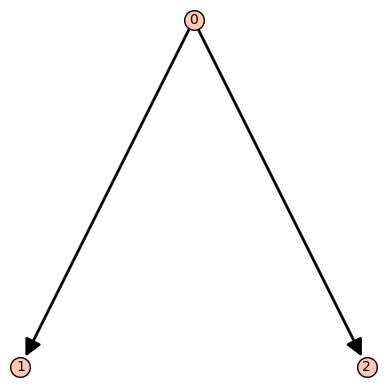

Found:  6  correct increasing labelings.
[0, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 1, 1]
[0, 2, 1]
[0, 1, 2]


In [390]:
from sage.combinat.binary_tree import *
all_trees = FullBinaryTrees_size(1)
it = iter(all_trees)
for item in it:
    item.graph().show(layout="tree")
    accepted = try_labelings(item.graph())
    print("Found: ", len(accepted), " correct increasing labelings.")
    for item in accepted:
        print(item)

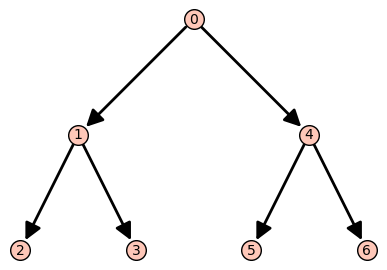

Found:  1460  correct increasing labelings.


In [391]:
from sage.combinat.binary_tree import *
all_trees = FullBinaryTrees_size(3)
it = iter(all_trees)
for item in it:
    item.graph().show(layout="tree")
    print("Found: ", len(try_labelings(item.graph())), " correct increasing labelings.")

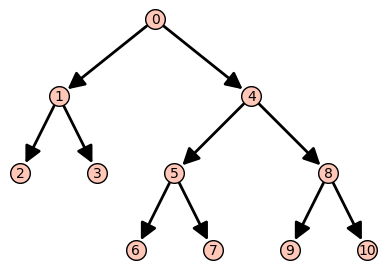

KeyboardInterrupt: 

In [273]:
from sage.combinat.binary_tree import *
all_trees = FullBinaryTrees_size(5)
it = iter(all_trees)
for item in it:
    item.graph().show(layout="tree")
    print("Found: ", len(try_labelings(item.graph())), " correct increasing labelings.")

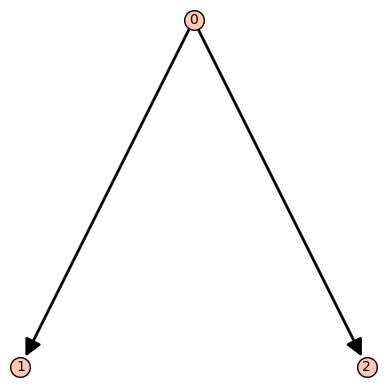

Found:  6  correct increasing labelings.


In [392]:
from sage.combinat.binary_tree import *
all_trees = BinaryTrees_size(1)
it = iter(all_trees)
for item in it:
    item.graph().show(layout="tree")
    accepted = try_labelings(item.graph())
    print("Found: ", len(accepted), " correct increasing labelings.")

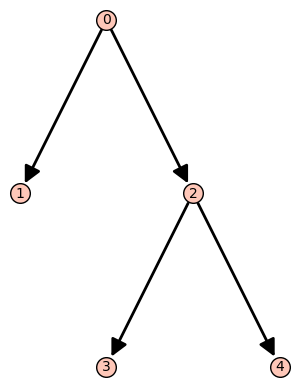

Found:  64  correct increasing labelings for the above tree (up to iso). There's 2 of these


In [395]:
from sage.combinat.binary_tree import *
all_trees = BinaryTrees_size(2)
it = iter(all_trees)

non_isomorphic = []

for item in it:
    tree = item.graph()
    
    found_in_list = False
    for tree_class in non_isomorphic:
            if tree_class[0].is_isomorphic(tree):
                tree_class[1] += 1
                found_in_list = True
                break
    
    if not found_in_list:
        non_isomorphic.append([tree,1])
            

for tree, occurences in non_isomorphic:
    tree.show(layout="tree")
    accepted = try_labelings(tree)
    print("Found: ", len(accepted), " correct increasing labelings for the above tree (up to iso). There's", occurences, "of these")
    #for item in accepted:
    #    print(item)

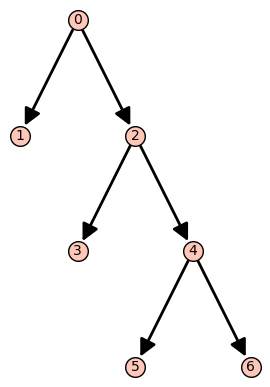

Found:  1008  correct increasing labelings for the above tree (up to iso). There's 4 of these


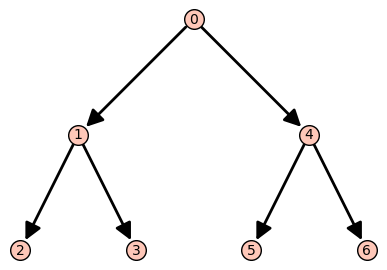

Found:  1460  correct increasing labelings for the above tree (up to iso). There's 1 of these


In [396]:
from sage.combinat.binary_tree import *
all_trees = BinaryTrees_size(3)
it = iter(all_trees)

non_isomorphic = []

for item in it:
    tree = item.graph()
    
    found_in_list = False
    for tree_class in non_isomorphic:
            if tree_class[0].is_isomorphic(tree):
                tree_class[1] += 1
                found_in_list = True
                break
    
    if not found_in_list:
        non_isomorphic.append([tree,1])
            

for tree, occurences in non_isomorphic:
    tree.show(layout="tree")
    accepted = try_labelings(tree)
    print("Found: ", len(accepted), " correct increasing labelings for the above tree (up to iso). There's", occurences, "of these")

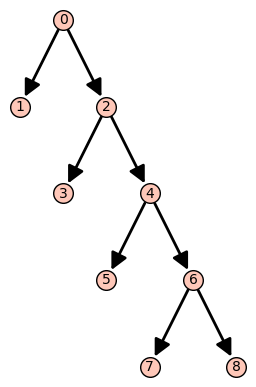

KeyboardInterrupt: 

In [397]:
from sage.combinat.binary_tree import *
all_trees = BinaryTrees_size(4)
it = iter(all_trees)

non_isomorphic = []

for item in it:
    tree = item.graph()
    
    found_in_list = False
    for tree_class in non_isomorphic:
            if tree_class[0].is_isomorphic(tree):
                tree_class[1] += 1
                found_in_list = True
                break
    
    if not found_in_list:
        non_isomorphic.append([tree,1])
            

for tree, occurences in non_isomorphic:
    tree.show(layout="tree")
    accepted = try_labelings(tree)
    print("Found: ", len(accepted), " correct increasing labelings for the above tree (up to iso). There's", occurences, "of these")